<a href="https://colab.research.google.com/github/pinedance/gym-AI-NLP/blob/main/gym_word_embeddings_with_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embeddings with BERT

REF
* [BERT Word Embeddings Tutorial](https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)
* [Getting Contextualized Word Embeddings with BERT](https://medium.com/@r3d_robot/getting-contextualized-word-embeddings-with-bert-20798d8b43a4)
* [3 Types of Contextualized Word Embeddings From BERT Using Transfer Learning](https://towardsdatascience.com/3-types-of-contextualized-word-embeddings-from-bert-using-transfer-learning-81fcefe3fe6d)


In [1]:
import torch
from transformers import BertTokenizer, BertModel

import pandas as pd
import numpy as np
import nltk

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True, )
# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [4]:
# Setting up the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
def bert_text_preparation(text, tokenizer):
    """
    Preprocesses text input in a way that BERT can interpret.
    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)
    # convert inputs to tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensor = torch.tensor([segments_ids])
    return tokenized_text, tokens_tensor, segments_tensor

In [8]:
text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."
tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)

In [10]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers.
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)

In [12]:
# Evaluating the model will return a different number of objects based on
# how it's  configured in the `from_pretrained` call earlier. In this case,
# becase we set `output_hidden_states = True`, the third item will be the
# hidden states from all layers. See the documentation for more details:
# https://huggingface.co/transformers/model_doc/bert.html#bertmodel

# hidden_states = outputs[2]
hidden_states = outputs.hidden_states

In [13]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.4964, -0.1831, -0.5231,  ..., -0.1902,  0.3738,  0.3964],
         [-0.1323, -0.2762, -0.3495,  ..., -0.4567,  0.3786, -0.1096],
         [-0.3626, -0.4002,  0.0676,  ..., -0.3207, -0.2709, -0.3004],
         ...,
         [ 0.2961, -0.2856, -0.0382,  ..., -0.6056, -0.5163,  0.2005],
         [ 0.4878, -0.0909, -0.2358,  ..., -0.0017, -0.5945, -0.2431],
         [-0.2517, -0.3519, -0.4688,  ...,  0.2500,  0.0336, -0.2627]]]), pooler_output=tensor([[-0.6031, -0.3342, -0.7174,  0.3347,  0.5145, -0.1722,  0.4502,  0.2768,
         -0.3769, -0.9998, -0.3657,  0.7535,  0.9817, -0.0192,  0.7959, -0.3459,
         -0.1338, -0.3026,  0.1097,  0.5836,  0.5736,  0.9999,  0.1798,  0.1845,
          0.2250,  0.9109, -0.5653,  0.8616,  0.8994,  0.7423, -0.2525,  0.0394,
         -0.9894, -0.1331, -0.7763, -0.9826,  0.2223, -0.6115,  0.1941,  0.0177,
         -0.7634,  0.2312,  0.9999, -0.7000,  0.4623, -0.2202, -1.0000,  0.

In [14]:
outputs[2] == outputs.hidden_states

True

In [15]:
outputs[2][-1] == outputs.last_hidden_state

tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]]])

In [16]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")

layer_i = 0
print ("Number of batches:", len(hidden_states[layer_i]))

batch_i = 0
print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))

token_i = 0
print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


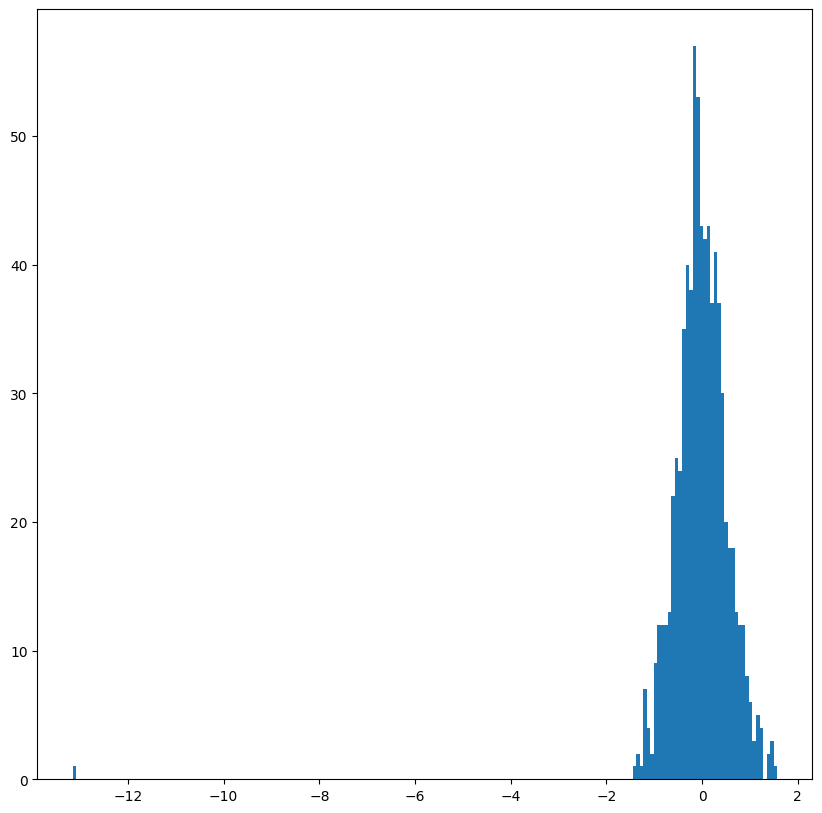

In [17]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [18]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [19]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 22, 768])

In [20]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([22, 13, 768])

In [21]:
#  concatenate the last four layers
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)

    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


In [22]:
token_vector = token_vecs_cat

In [24]:
for i, token_str in enumerate( tokenized_text ) :
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [25]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vector[6][:5]))
print("bank robber  ", str(token_vector[10][:5]))
print("river bank   ", str(token_vector[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 0.9001, -0.5380, -0.1669,  0.2242,  0.6897])
bank robber   tensor([ 0.7977, -0.5217, -0.1984,  0.1890,  0.5941])
river bank    tensor([ 0.2961, -0.2856, -0.0382,  0.1674,  0.7713])


In [26]:
from scipy.spatial.distance import cosine

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "river bank" (different meanings).
diff_bank = 1 - cosine(token_vector[10], token_vector[19])

# Calculate the cosine similarity between the word bank
# in "bank robber" vs "bank vault" (same meaning).
same_bank = 1 - cosine(token_vector[10], token_vector[6])

print('Vector similarity for  *similar*  meanings:  %.2f' % same_bank)
print('Vector similarity for *different* meanings:  %.2f' % diff_bank)

Vector similarity for  *similar*  meanings:  0.94
Vector similarity for *different* meanings:  0.69


In [27]:
sentences = ["bank",
	"he eventually sold the shares back to the bank at a premium.",
	"the bank strongly resisted cutting interest rates.",
	"the bank will supply and buy back foreign currency.",
	"the bank is pressing us for repayment of the loan.",
	"the bank left its lending rates unchanged.",
	"the river flowed over the bank.",
	"tall, luxuriant plants grew along the river bank.",
	"his soldiers were arrayed along the river bank.",
	"wild flowers adorned the river bank.",
	"two fox cubs romped playfully on the river bank.",
	"the jewels were kept in a bank vault.",
	"you can stow your jewellery away in the bank.",
	"most of the money was in storage in bank vaults.",
	"the diamonds are shut away in a bank vault somewhere.",
	"thieves broke into the bank vault.",
	"can I bank on your support?",
	"you can bank on him to hand you a reasonable bill for your services.",
	"don't bank on your friends to help you out of trouble.",
	"you can bank on me when you need money.",
	"i bank on your help."
]